# Import Necessary Modules

In [163]:
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import linear_model, metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Load Data from Google Drive

In [225]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile({'q': "'1sLFU_eR_2d31kBVl60Wm9ztZ7dqKAAau' in parents and trashed=false"}).GetList()
for file1 in file_list:
  try:
    f_holder = drive.CreateFile({'id': file1['id']})
    f_holder.GetContentFile(file1['title'])
    print('title: %s, id: %s' % (file1['title'], file1['id']))
  except Exception as e:
    print(e)
  kenya_loans = pd.read_csv("kenya_loans.csv")
    

title: kenya_loans.csv, id: 1uWvHyvzxCp44Na38xwx3FLgDziAIM7kT
title: wb_subnational_poverty_data.csv, id: 1PHLWhaI0-EQ61GnwZ-77eI47TBZPp5Sy
title: Untitled.ipynb, id: 1ra_xxCVVoNK0jb_i0AHH5PLPvEo8pgBf
title: subnational_poverty_footnote.csv, id: 1FAH2ysuv8fXVSDaOAOPuNFZxivcUJ6xD
title: subnational_poverty_country.csv, id: 1sAAnalPC_hHqJMz-5TRvt7fIJ2FCcSkF
title: MPI_subnational.csv, id: 1P3Qc2g0f1FkDWtpsbU82vTeFeuhxJqgN
title: MPI_national.csv, id: 12Nk_U_5fRlfDNuQPqXctJfUHzPFguv-Z
No downloadLink/exportLinks for mimetype found in metadata
No downloadLink/exportLinks for mimetype found in metadata
No downloadLink/exportLinks for mimetype found in metadata
No downloadLink/exportLinks for mimetype found in metadata


# Data Preprocessing

In [190]:
# statistical summary of data
kenya_loans.describe()

,id,funded_amount,partner_id,term_in_months,lender_count,MPI,Poverty Gap,rural_pct,Severity of Poverty
count,6.183900e+04,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,60620.000000,61839.000000
mean,9.959779e+05,461.291418,181.976859,13.601465,14.017820,0.197718,9.241762,70.614748,3.621525
std,1.922022e+05,759.314374,75.812857,7.833545,22.328336,0.053038,4.200141,38.834722,2.090779
min,6.531570e+05,25.000000,133.000000,2.000000,1.000000,0.020000,2.400000,0.000000,0.500000
25%,8.399360e+05,225.000000,138.000000,11.000000,7.000000,0.205000,7.500000,65.000000,2.700000
50%,9.952440e+05,350.000000,156.000000,14.000000,10.000000,0.205000,9.100000,99.000000,3.400000
75%,1.174202e+06,550.000000,164.000000,14.000000,17.000000,0.223000,10.800000,99.000000,4.000000
max,1.335884e+06,50000.000000,529.000000,122.000000,1589.000000,0.509000,46.000000,99.000000,30.800000


**Remove rows with NA (blank) cells**

In [0]:
kenya_loans = kenya_loans.dropna()

In [193]:
kenya_loans.head()

,id,funded_amount,activity,sector,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,time_to_fund,MPI,Poverty Gap,Loan Theme ID,Loan Theme Type,For_Kiva,rural_pct,Severity of Poverty
0,653185,250,Fruits & Vegetables,Food,164,13,7,female,irregular,21,0.242,7.7,a1050000000wf14,General,No,99.0,2.7
1,653237,250,Cosmetics Sales,Retail,164,14,3,female,irregular,26,0.242,7.5,a1050000000wf14,General,No,99.0,3.3
2,653229,250,Tailoring,Services,164,14,1,female,irregular,24,0.242,7.5,a1050000000wf14,General,No,99.0,3.3
3,653247,250,Food Stall,Food,164,13,9,female,irregular,31,0.242,7.7,a1050000000wf14,General,No,99.0,2.7
4,653345,600,Fruits & Vegetables,Food,164,14,22,female,irregular,25,0.242,7.5,a1050000000wf14,General,No,99.0,3.3


# **Visualize relationships in data**

In [0]:
data = kenya_loans
labels = data['Severity of Poverty']

Text(0.5,1,'Correlation between different features')

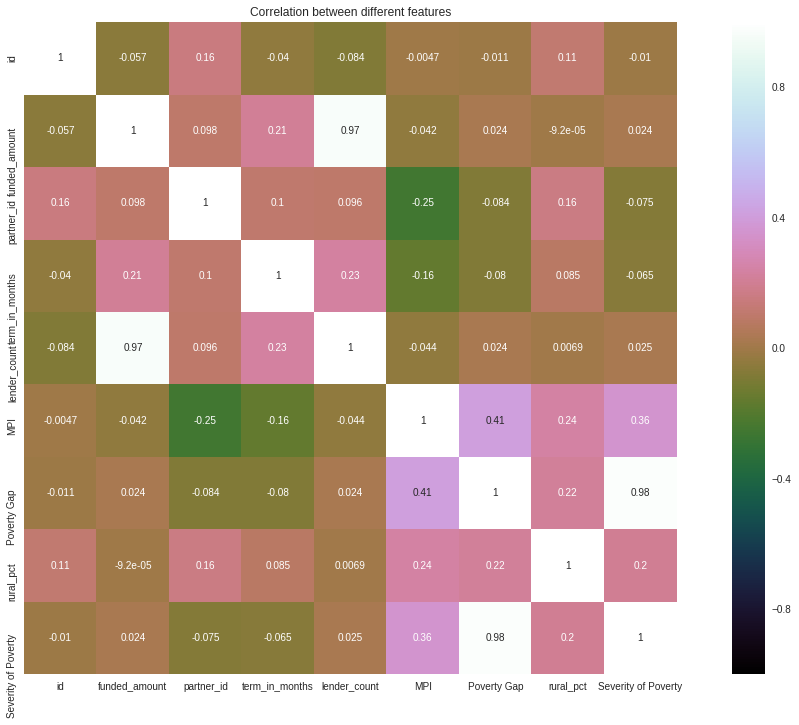

In [228]:
#Correlation Matrix
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between different features')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 10 funded regions in Kenya')

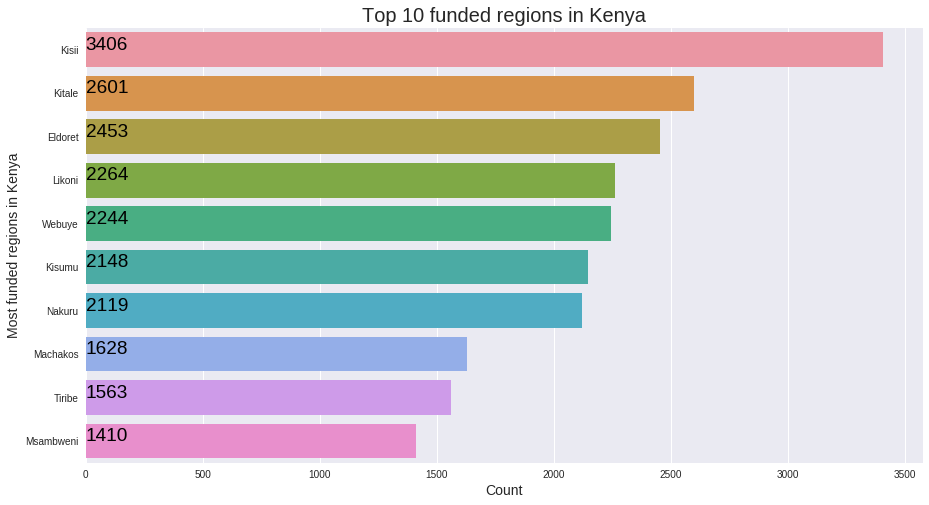

In [230]:
plt.figure(figsize=(15,8))
count = data['region'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Most funded regions in Kenya', fontsize=14)
plt.title("Top 10 funded regions in Kenya", fontsize=20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 10 funded sectorss in Kenya')

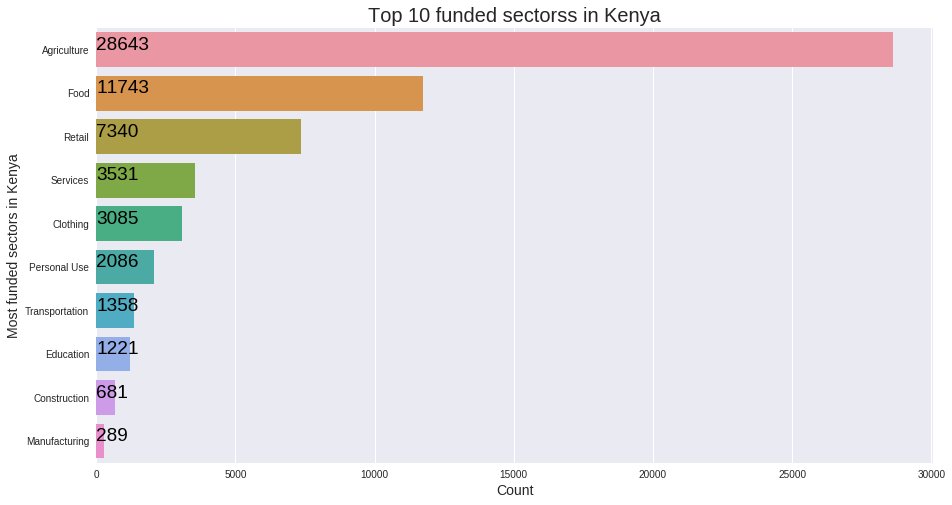

In [232]:
plt.figure(figsize=(15,8))
count = data['sector'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Most funded sectors in Kenya', fontsize=14)
plt.title("Top 10 funded sectorss in Kenya", fontsize=20)

*Drop columns with data that we'll not require to build a model*

In [0]:
kenya_loans['time_to_fund'] = [int(i[:2]) for i in kenya_loans.time_to_fund]
kenya_loans = kenya_loans.drop(['country_code', 'country', 'region'], axis=1)

*Notice how many unique values are contained in 'borrower_genders' column.
These would lead to many unnecessary columns being created after label encoding has been done*

In [219]:
len(set(data['borrower_genders']))


4689

Separate labels from the rest of the data

Reduce the number of unique gender values to "male" and "female"

In [0]:
data.borrower_genders = ["male" if i[0]=="m" else "female" for i in data.borrower_genders]

In [0]:
set(data.activity);

In [0]:
data = data.drop(['id', 'activity','Severity of Poverty', 'Loan Theme ID'], axis=1)

In [206]:
data.head()

,funded_amount,sector,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,time_to_fund,MPI,Poverty Gap,Loan Theme Type,For_Kiva,rural_pct
0,250,Food,164,13,7,female,irregular,21,0.242,7.7,General,No,99.0
1,250,Retail,164,14,3,female,irregular,26,0.242,7.5,General,No,99.0
2,250,Services,164,14,1,female,irregular,24,0.242,7.5,General,No,99.0
3,250,Food,164,13,9,female,irregular,31,0.242,7.7,General,No,99.0
4,600,Food,164,14,22,female,irregular,25,0.242,7.5,General,No,99.0


**Perform one Hot encoding**

In [0]:
data = pd.get_dummies(data, prefix=['sector', 'sex', 'interv', 'theme'], columns=['sector', 'borrower_genders', 'repayment_interval', 'Loan Theme Type'])


Use label encoder to encode data contained in "For_Kiva" column

In [0]:
le = LabelEncoder()
data.For_Kiva = le.fit_transform(data.For_Kiva)

In [187]:
print(data.head())
print(data.shape)


       id  funded_amount             activity  partner_id  term_in_months  \
0  653185            250  Fruits & Vegetables         164              13   
1  653237            250      Cosmetics Sales         164              14   
2  653229            250            Tailoring         164              14   
3  653247            250           Food Stall         164              13   
4  653345            600  Fruits & Vegetables         164              14   

   lender_count  time_to_fund    MPI  Poverty Gap    Loan Theme ID  \
0             7            21  0.242          7.7  a1050000000wf14   
1             3            26  0.242          7.5  a1050000000wf14   
2             1            24  0.242          7.5  a1050000000wf14   
3             9            31  0.242          7.7  a1050000000wf14   
4            22            25  0.242          7.5  a1050000000wf14   

               ...               theme_SME  theme_Sanitation  \
0              ...                       0          

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [159]:
print ('R^2 score for the model: ', model.score(X_train,y_train))

y_pred = model.predict(X_test)


# RMSE
print('Root mean squared error between y_pred and y_test: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 score for the model:  0.9588545805215123
Root mean squared error between y_pred and y_test:  0.4301681496107223


In [162]:
print((accuracy_score(y_test, y_pred)))

ValueError: ignored